In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer

In [4]:
data = pd.read_csv(r'C:\Users\LENOVO\Desktop\Y4S1\ML\Assignment\1\housing.csv')
print(f"Number of rows in the dataset: {len(data)}")
data.head()

Number of rows in the dataset: 20640


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         496         177         7.2574              352100        NEAR BAY  
3         558         219         5.6431              341300        NEAR BAY  
4         565         259         3.8462              342200        NEAR BAY

In [5]:
min_values = data.select_dtypes(include=np.number).min()
max_values = data.select_dtypes(include=np.number).max()
mean_values = data.select_dtypes(include=np.number).mean()
median_values = data.select_dtypes(include=np.number).median()
stdev = data.select_dtypes(include=np.number).std()

print("Descriptive Statistics:")
print(data.describe())

print("\nMedian of the numeric columns:")
print(median_values)

print("\nMean of the numeric columns:")
print(mean_values)

print("\nStandard Deviation of the numeric columns:")
print(stdev)

Descriptive Statistics:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900

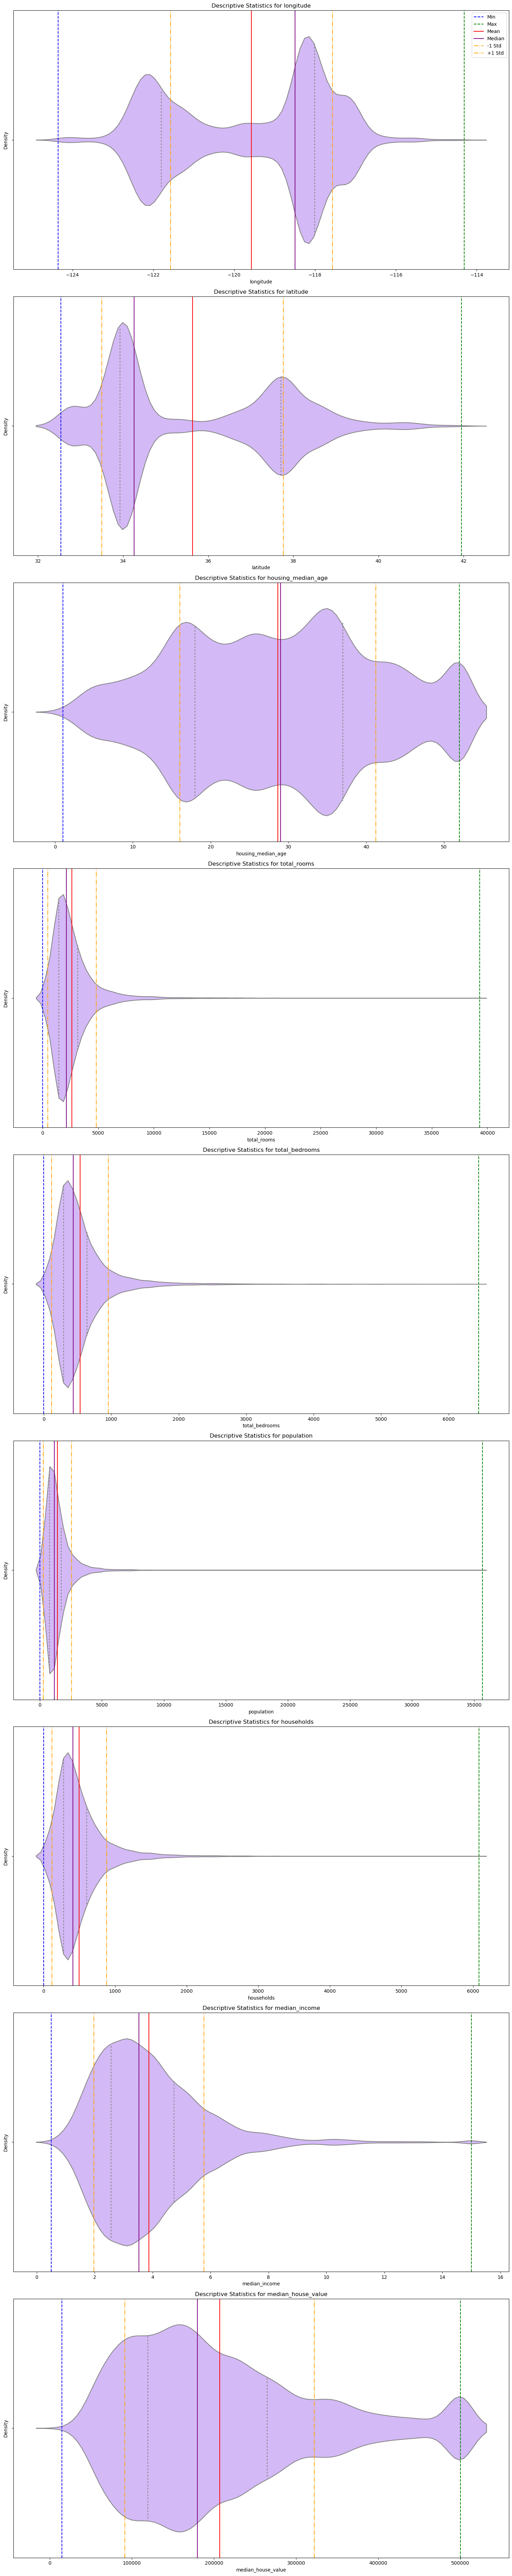

In [7]:
plt.figure(figsize=(15, 75))

for i, column in enumerate(numeric_columns.columns):
    plt.subplot(len(numeric_columns.columns), 1, i + 1)  
    sns.violinplot(x=data[column], inner="quartile", color="#d2afff")
    
    min_val = data[column].min()
    max_val = data[column].max()
    mean_val = data[column].mean()
    median_val = data[column].median()
    std_val = data[column].std()
    
    plt.axvline(min_val, color='blue', linestyle='--', label='Min')
    plt.axvline(max_val, color='green', linestyle='--', label='Max')
    plt.axvline(mean_val, color='red', linestyle='-', label='Mean')
    plt.axvline(median_val, color='purple', linestyle='-', label='Median')
    plt.axvline(mean_val - std_val, color='orange', linestyle='-.', label='-1 Std')
    plt.axvline(mean_val + std_val, color='orange', linestyle='-.', label='+1 Std')
    
    plt.title(f'Descriptive Statistics for {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    
    if i == 0: 
        plt.legend()

plt.tight_layout()

plt.show()

Non-parametric: KDE makes no assumptions about the form of the underlying distribution, unlike parametric methods such as assuming a normal distribution.

Bandwidth: The smoothness of the KDE curve depends on the "bandwidth" parameter. A small bandwidth results in a very wavy curve, while a large bandwidth oversmooths the data. Selecting an appropriate bandwidth is crucial to get a good estimate.

Smoothing: KDE smooths the data by overlapping small kernel functions (often Gaussian) around each data point, resulting in a smoother estimate of the data distribution compared to a histogram.

In [6]:
missing_data = data.isnull().sum()
columns_with_missing = missing_data[missing_data > 0]
print("Columns with missing values and their counts:\n", columns_with_missing)

rows_with_missing = data.isnull().any(axis=1).sum()
print(f"\nNumber of rows with missing values: {rows_with_missing}")

numeric_columns = data.select_dtypes(include='number')
data[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.mean())

print("\nMissing values in numeric columns have been imputed with the mean of the respective columns.")


Columns with missing values and their counts:
 total_bedrooms    207
dtype: int64

Number of rows with missing values: 207

Missing values in numeric columns have been imputed with the mean of the respective columns.


Columns with missing values and their counts:
 total_bedrooms    207
dtype: int64


C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


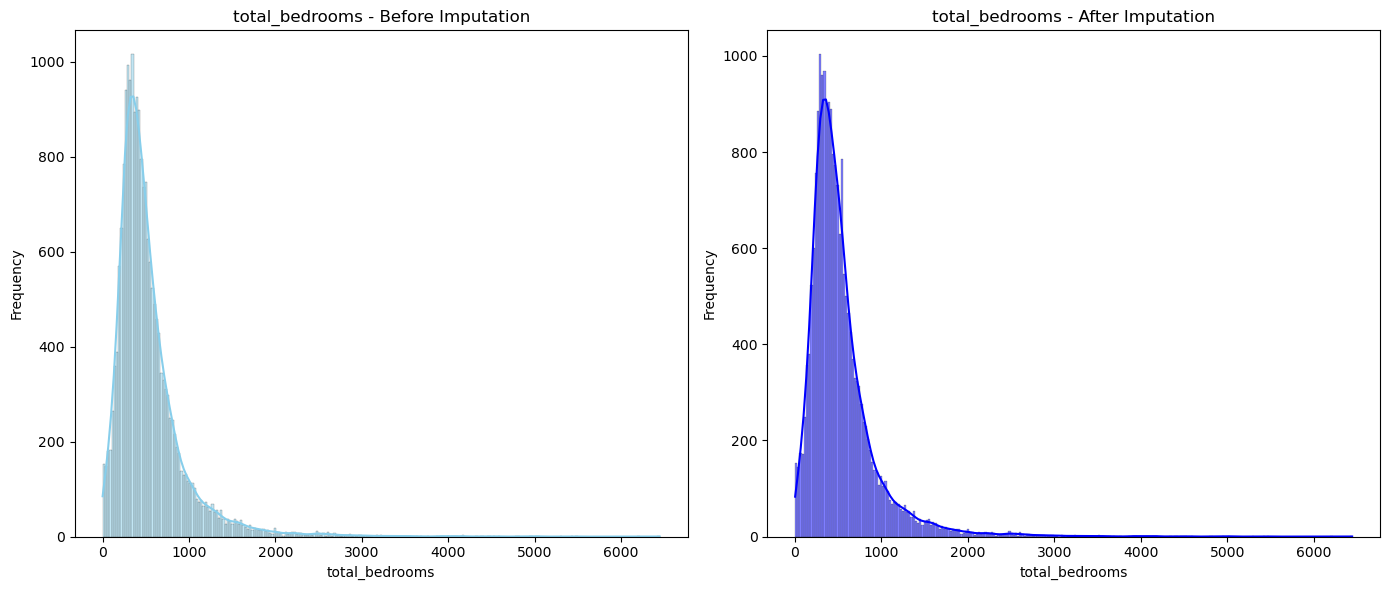


Missing values in numeric columns have been imputed with the mean of the respective columns.


In [106]:
def plot_distribution_before_after(df, columns_with_missing):

    df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)

    for column in columns_with_missing.index:
        plt.figure(figsize=(14, 6))

        plt.subplot(1, 2, 1)
        sns.histplot(df[column].dropna(), kde=True, color='skyblue')
        plt.title(f'{column} - Before Imputation')
        plt.xlabel(column)
        plt.ylabel('Frequency')

        imputed_column = df[column].fillna(df[column].mean())

        plt.subplot(1, 2, 2)
        sns.histplot(imputed_column, kde=True, color='blue')
        plt.title(f'{column} - After Imputation')
        plt.xlabel(column)
        plt.ylabel('Frequency')

        plt.tight_layout()
        plt.show()
        
data = pd.read_csv(r'C:\Users\LENOVO\Desktop\Y4S1\ML\assignment\housing.csv')

missing_data = data.isnull().sum()
columns_with_missing = missing_data[missing_data > 0]
print("Columns with missing values and their counts:\n", columns_with_missing)

plot_distribution_before_after(data, columns_with_missing)

numeric_columns = data.select_dtypes(include='number')
data[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.mean())

print("\nMissing values in numeric columns have been imputed with the mean of the respective columns.")

In [42]:
data.drop_duplicates(inplace=True)
print(f"Number of rows in the dataset after removal of duplicates: {len(data)}")

Number of rows in the dataset after removal of duplicates: 20640


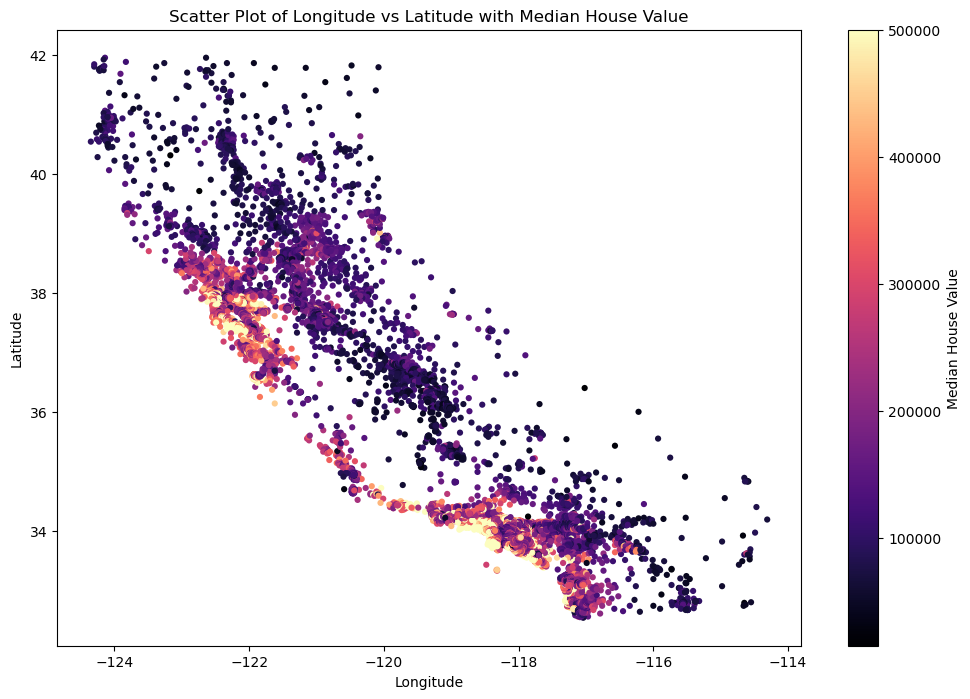

In [60]:
lon = data['longitude']
lat = data['latitude']
median_house_value = data['median_house_value']

plt.figure(figsize=(12, 8))

scatter = plt.scatter(
        data['longitude'], 
        data['latitude'], 
        c=data['median_house_value'], 
        cmap='magma', 
        s=20,           
        edgecolor='None',  
        alpha=1  
    )

cbar = plt.colorbar(scatter)
cbar.set_label('Median House Value')

plt.title('Scatter Plot of Longitude vs Latitude with Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

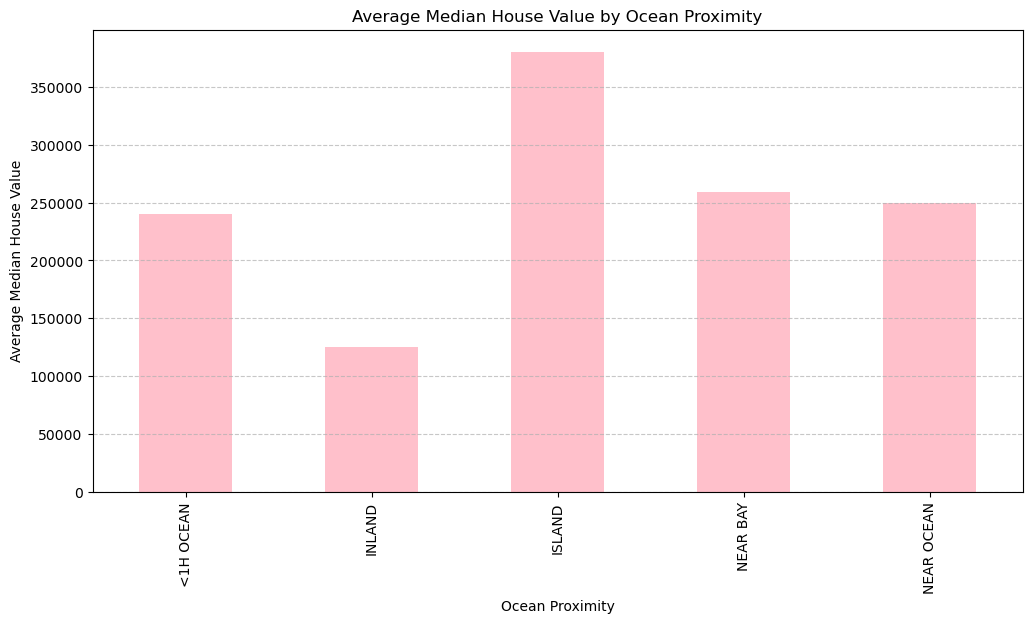

In [68]:
#Average Median House Value for Different Ocean Proximity Categories
average_values = data.groupby('ocean_proximity')['median_house_value'].mean()

plt.figure(figsize=(12, 6))
average_values.plot(kind='bar', color='pink')
plt.title('Average Median House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Average Median House Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

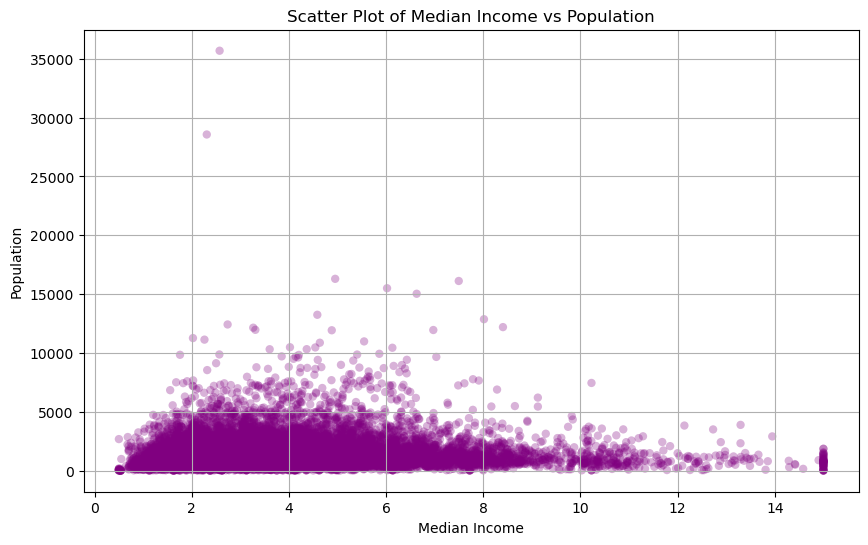

In [76]:
data = data.dropna(subset=['median_income', 'population'])

plt.figure(figsize=(10, 6))
plt.scatter(data['median_income'], data['population'], c='purple', alpha=0.3, edgecolor='none')

plt.xlabel('Median Income')
plt.ylabel('Population')
plt.title('Scatter Plot of Median Income vs Population')

plt.grid(True)
plt.show()

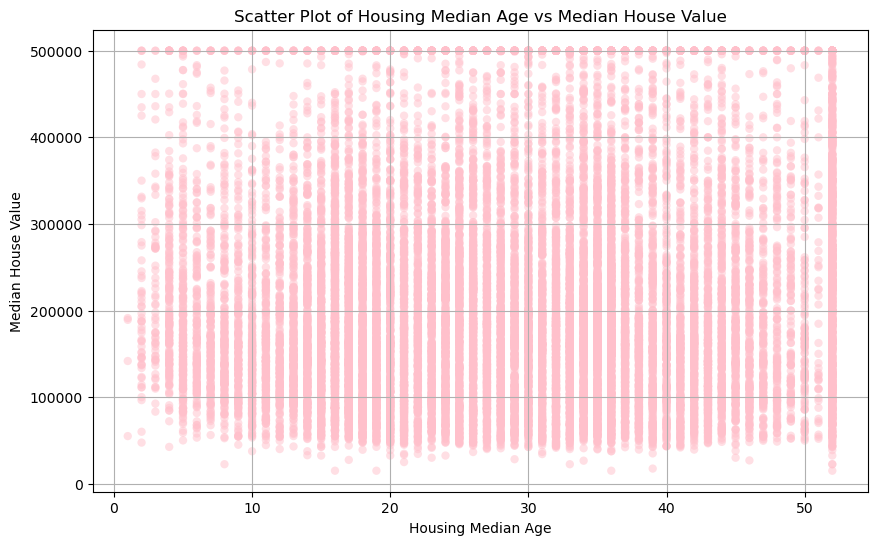

In [105]:
plt.figure(figsize=(10, 6))
plt.scatter(data['housing_median_age'], data['median_house_value'], c='pink', alpha=0.5, edgecolor='none')

plt.xlabel('Housing Median Age')
plt.ylabel('Median House Value')
plt.title('Scatter Plot of Housing Median Age vs Median House Value')

plt.grid(True)
plt.show()

Summary Statistics by Ocean Proximity:
 ocean_proximity               <1H OCEAN        INLAND         ISLAND  \
longitude          count    9136.000000    6551.00000       5.000000   
                   mean     -118.847766    -119.73299    -118.354000   
                   std         1.588888       1.90095       0.070569   
                   min      -124.140000    -123.73000    -118.480000   
                   25%      -118.500000    -121.35000    -118.330000   
...                                 ...           ...            ...   
median_house_value min     17500.000000   14999.00000  287500.000000   
                   25%    164100.000000   77500.00000  300000.000000   
                   50%    214850.000000  108500.00000  414700.000000   
                   75%    289100.000000  148950.00000  450000.000000   
                   max    500001.000000  500001.00000  450000.000000   

ocean_proximity                NEAR BAY     NEAR OCEAN  
longitude          count    2290.00000

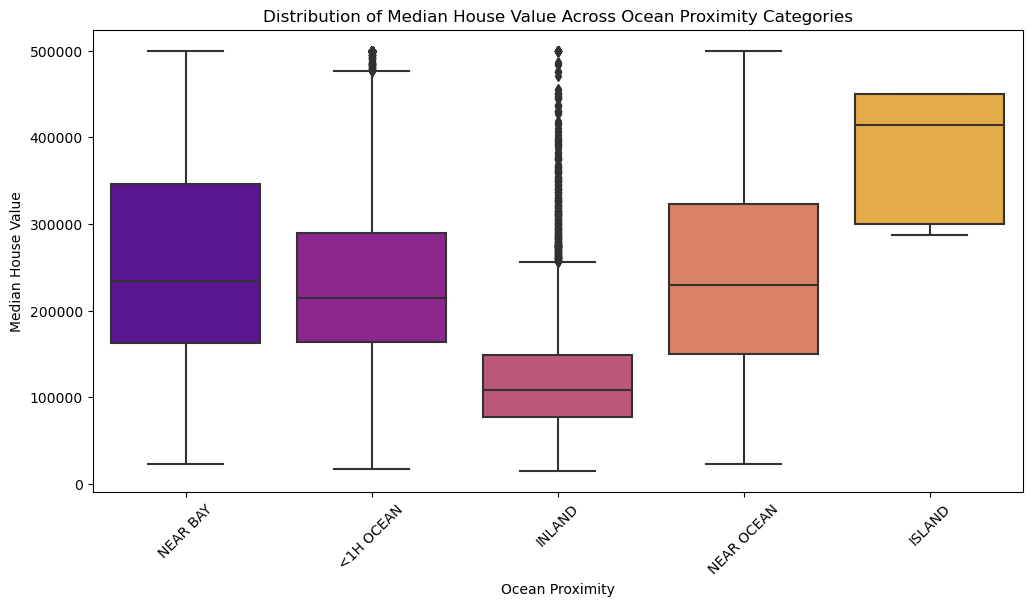


Ocean Proximity Encoding:
<1H OCEAN: 0
INLAND: 1
ISLAND: 2
NEAR BAY: 3
NEAR OCEAN: 4

First few rows with encoded 'ocean_proximity':
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0         322         126         8.3252              452600        NEAR BAY   
1        2401        1138         8.3014              358500        NEAR BAY   
2         496         177         7.2574              352100        NEAR BAY   
3         558         219         5.6431              341300        NEAR BAY   
4         565 

In [11]:
from sklearn.preprocessing import LabelEncoder
grouped = data.groupby('ocean_proximity').describe().transpose()

print("Summary Statistics by Ocean Proximity:\n", grouped)

plt.figure(figsize=(12, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=data, palette='plasma')
plt.title('Distribution of Median House Value Across Ocean Proximity Categories')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.xticks(rotation=45)
plt.show()

ocean_proximity_le = LabelEncoder()
data['ocean_proximity_encoded'] = ocean_proximity_le.fit_transform(data['ocean_proximity'])

print("\nOcean Proximity Encoding:")
for category, encoding in zip(ocean_proximity_le.classes_, ocean_proximity_le.transform(ocean_proximity_le.classes_)):
    print(f"{category}: {encoding}")

print("\nFirst few rows with encoded 'ocean_proximity':\n", data.head())


Comparison: Box plots are useful for comparing distributions between different groups.
Identifying Skewness: They help to visualize skewness in the data. If the median is closer to one quartile than the other, the data may be skewed.
Detecting Outliers: Box plots are effective for spotting outliers in the dataset.

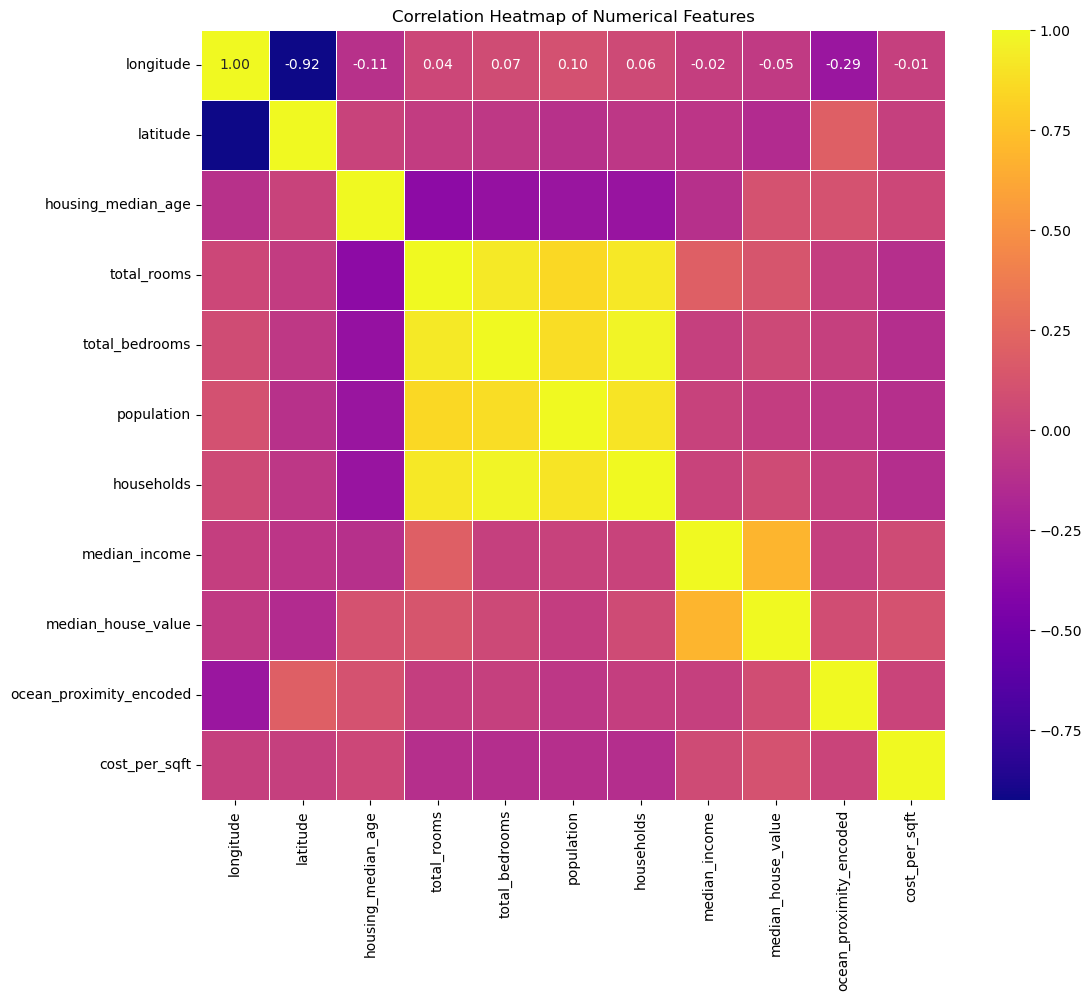

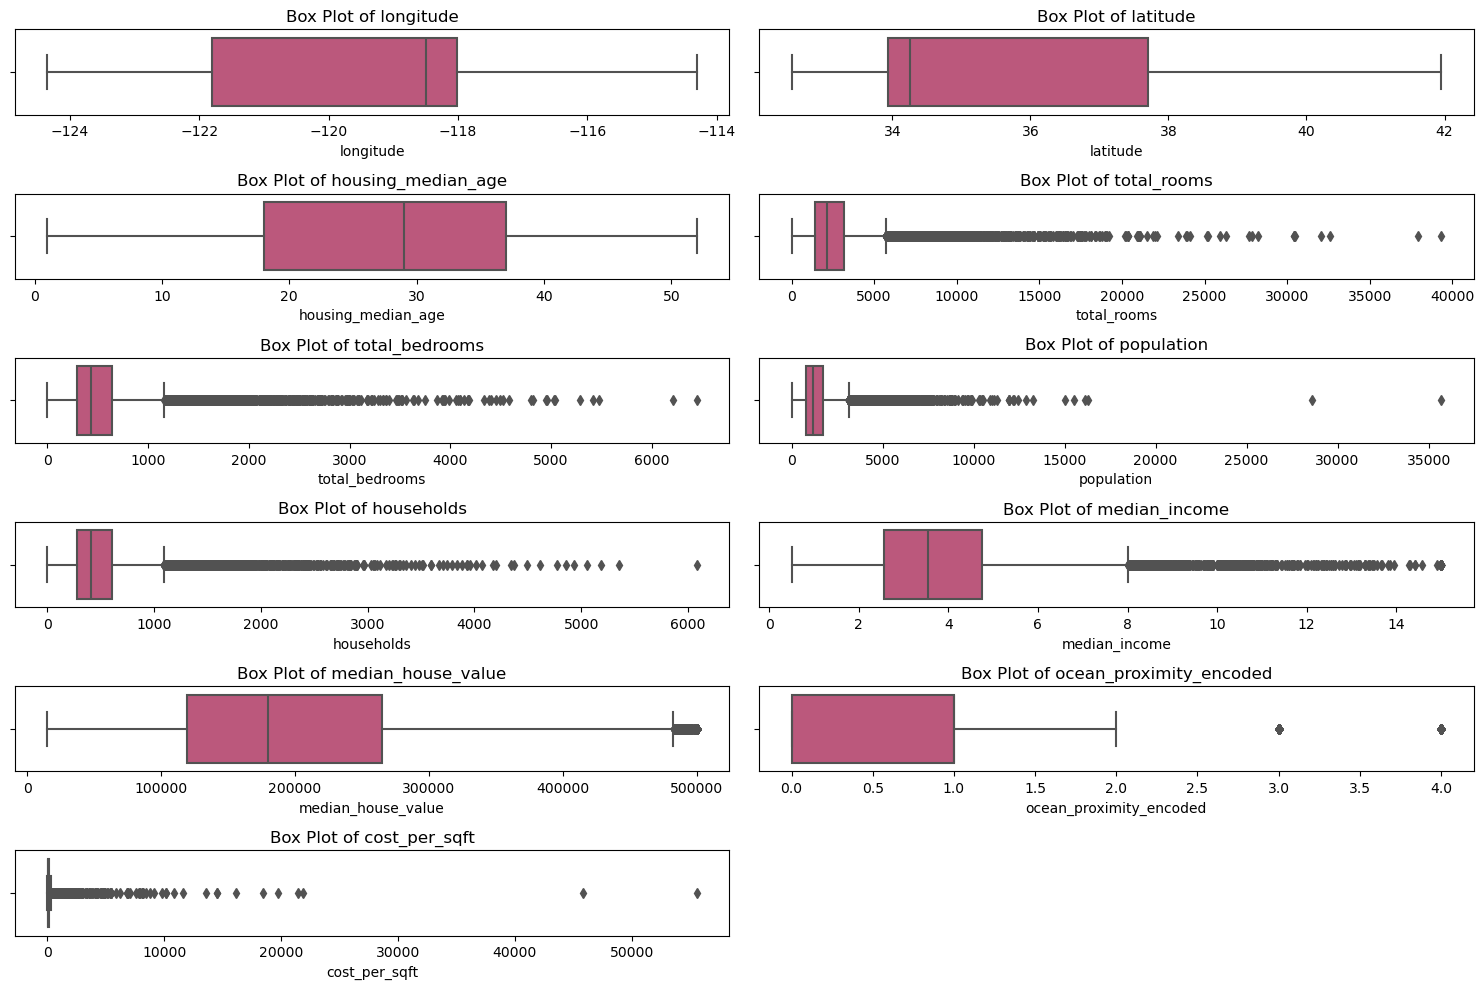

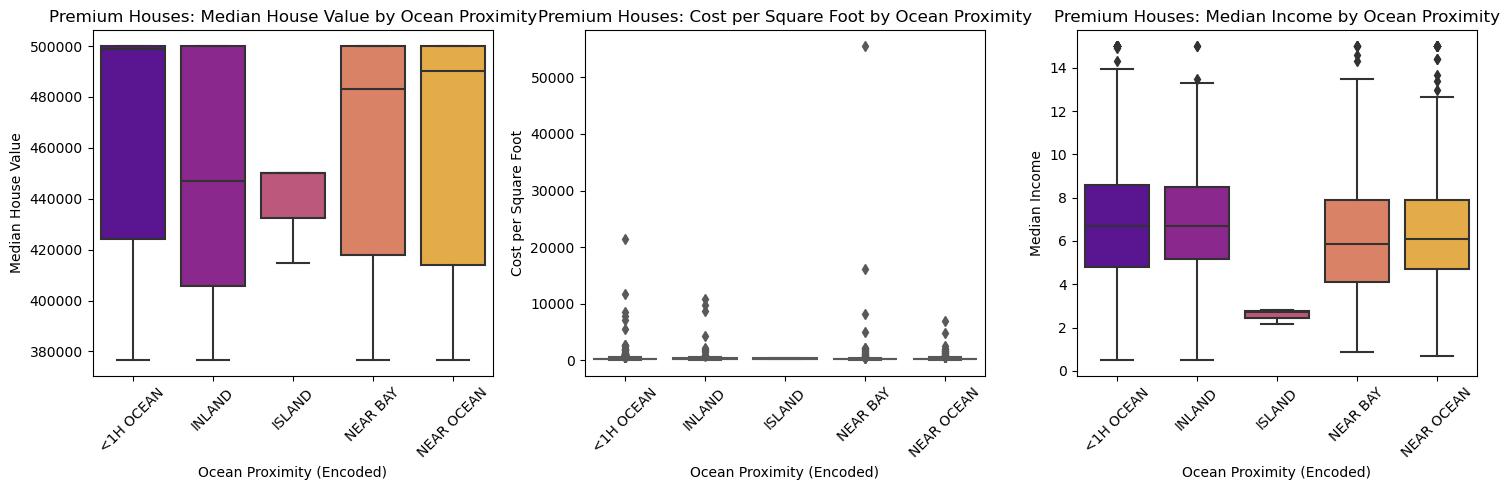

In [14]:
ocean_proximity_le = LabelEncoder()
data['ocean_proximity_encoded'] = ocean_proximity_le.fit_transform(data['ocean_proximity'])

numeric_data = data.select_dtypes(include='number')

plt.figure(figsize=(12, 10))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_data.columns):
    plt.subplot(len(numeric_data.columns) // 2 + 1, 2, i + 1)
    sns.boxplot(x=numeric_data[column], palette='plasma')
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

premium_threshold = data['median_house_value'].quantile(0.9)
premium_houses = data[data['median_house_value'] >= premium_threshold]
data['cost_per_sqft'] = data['median_house_value']/(data['total_rooms']+1)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='ocean_proximity_encoded', y='median_house_value', data=premium_houses, palette='plasma')
plt.title('Premium Houses: Median House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity (Encoded)')
plt.ylabel('Median House Value')
plt.xticks(ticks=range(len(ocean_proximity_le.classes_)), labels=ocean_proximity_le.classes_, rotation=45)

plt.subplot(1, 3, 2)
sns.boxplot(x='ocean_proximity_encoded', y='cost_per_sqft', data=premium_houses, palette='Set2')
plt.title('Premium Houses: Cost per Square Foot by Ocean Proximity')
plt.xlabel('Ocean Proximity (Encoded)')
plt.ylabel('Cost per Square Foot')
plt.xticks(ticks=range(len(ocean_proximity_le.classes_)), labels=ocean_proximity_le.classes_, rotation=45)

plt.subplot(1, 3, 3)
sns.boxplot(x='ocean_proximity_encoded', y='median_income', data=premium_houses, palette='plasma')
plt.title('Premium Houses: Median Income by Ocean Proximity')
plt.xlabel('Ocean Proximity (Encoded)')
plt.ylabel('Median Income')
plt.xticks(ticks=range(len(ocean_proximity_le.classes_)), labels=ocean_proximity_le.classes_, rotation=45)

plt.tight_layout()
plt.show()

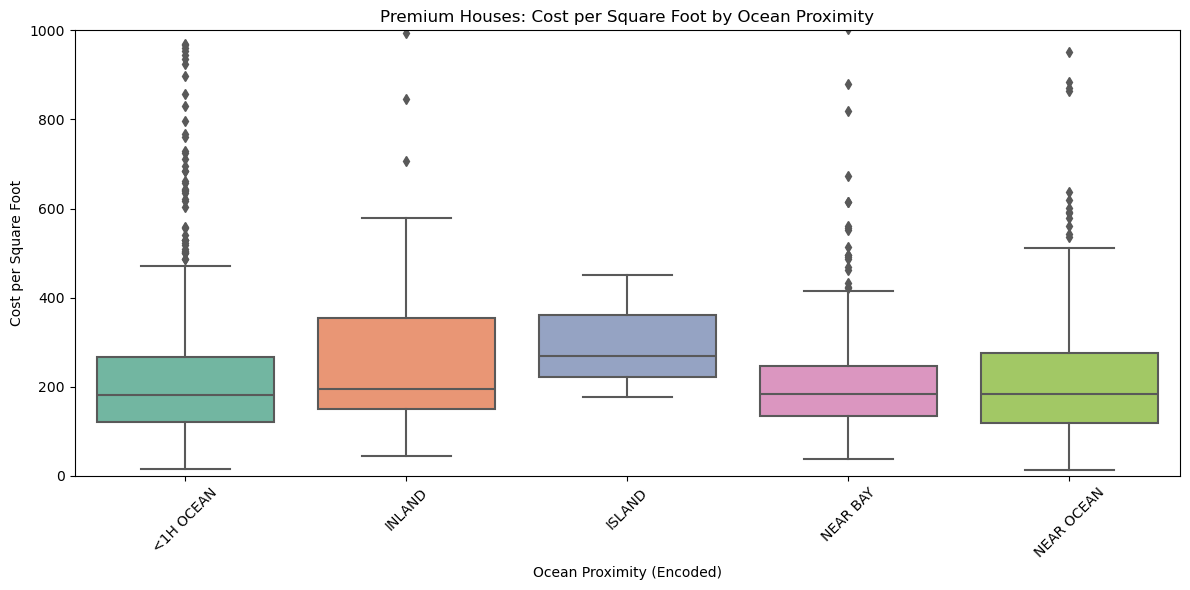

In [18]:
plt.figure(figsize=(12, 6))

sns.boxplot(x='ocean_proximity_encoded', y='cost_per_sqft', data=premium_houses, palette='Set2')
plt.title('Premium Houses: Cost per Square Foot by Ocean Proximity')
plt.xlabel('Ocean Proximity (Encoded)')
plt.ylabel('Cost per Square Foot')

plt.xticks(ticks=range(len(ocean_proximity_le.classes_)), labels=ocean_proximity_le.classes_, rotation=45)

plt.ylim(0, 1000)  

plt.tight_layout()
plt.show()

C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

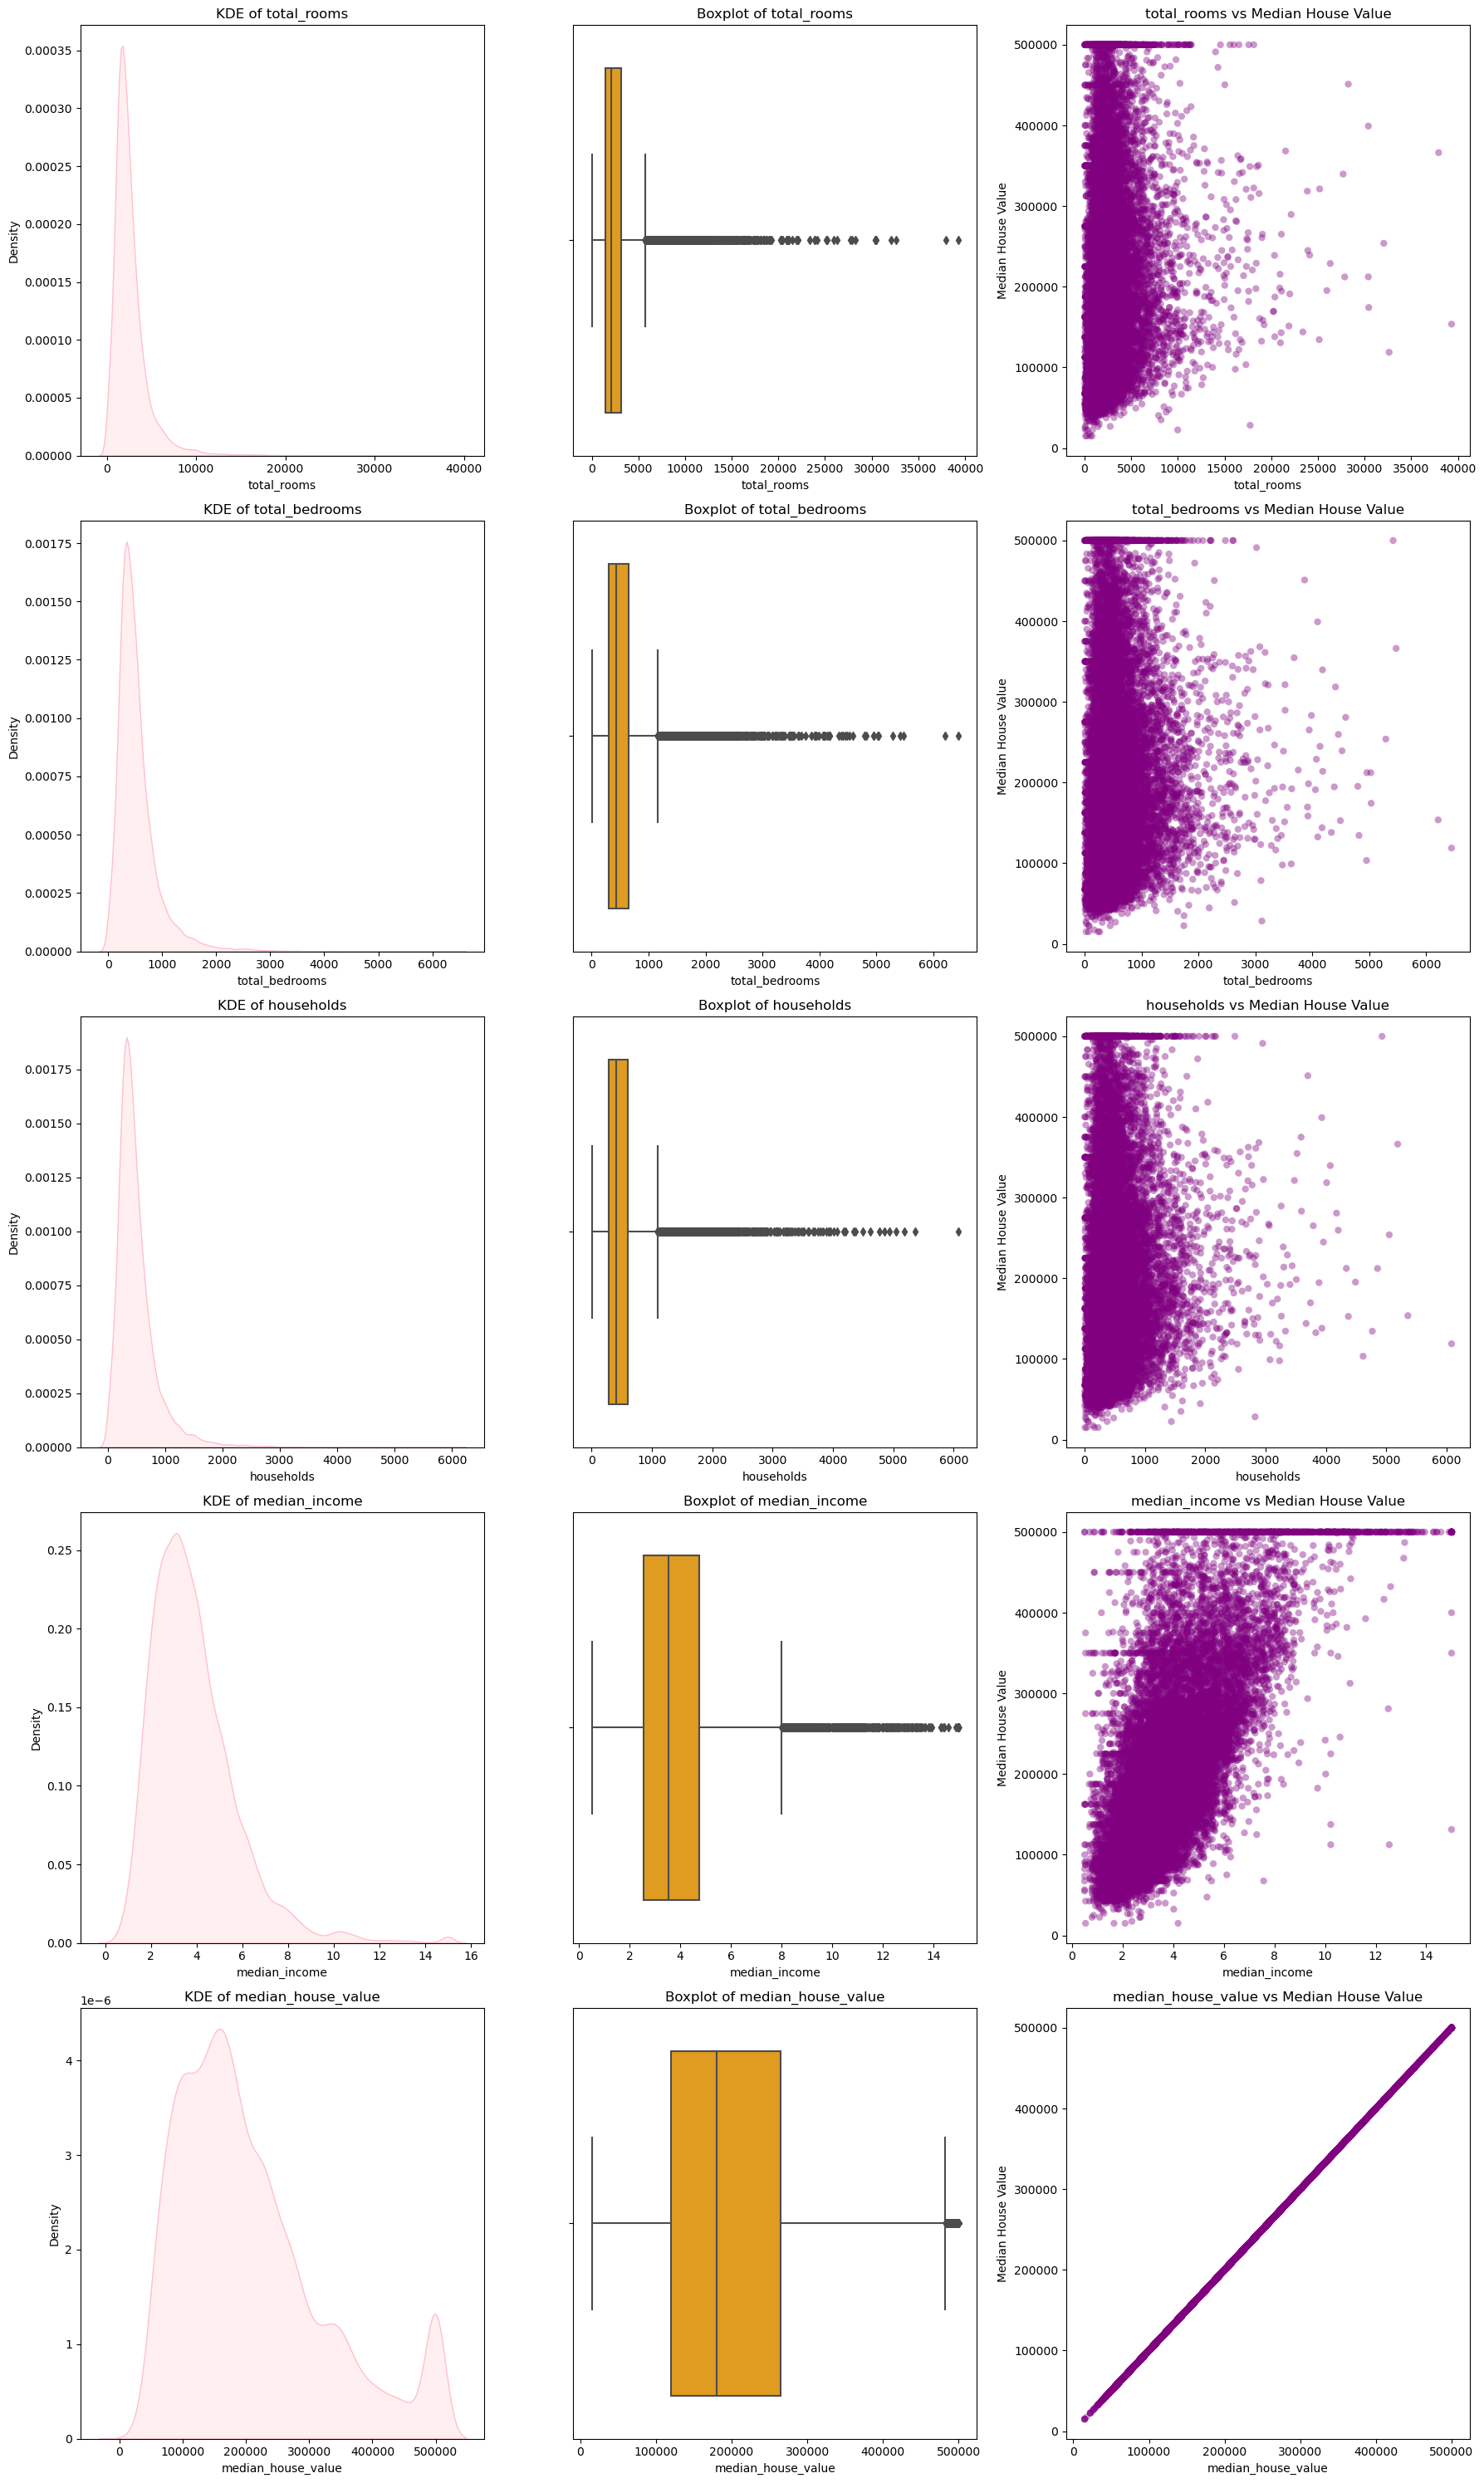

In [114]:
def visualize_column_relationship(data, column_names):

    num_columns = len(column_names)
    plt.figure(figsize=(18, 6 * num_columns)) 

    for i, column_name in enumerate(column_names):
        
        if column_name not in data.columns:
            print(f"Column '{column_name}' not found in the DataFrame.")
            continue

        plt.subplot(num_columns, 3, 3 * i + 1)
        sns.kdeplot(data[column_name], fill=True, color='pink')
        plt.title(f'KDE of {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Density')

        plt.subplot(num_columns, 3, 3 * i + 2)
        sns.boxplot(x=data[column_name], color='orange')
        plt.title(f'Boxplot of {column_name}')
        plt.xlabel(column_name)

        if 'median_house_value' in data.columns:
            plt.subplot(num_columns, 3, 3 * i + 3)
            sns.scatterplot(x=data[column_name], y=data['median_house_value'], color='purple', edgecolor='None', alpha=0.4)
            plt.title(f'{column_name} vs Median House Value')
            plt.xlabel(column_name)
            plt.ylabel('Median House Value')
        else:
            print("Column 'median_house_value' not found in the DataFrame. Scatterplot not generated.")

    plt.tight_layout()
    plt.show()

imp_columns = ['total_rooms', 'total_bedrooms', 'households', 'median_income', 'median_house_value']

visualize_column_relationship(data, imp_columns)


Number of outliers: 1383


C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


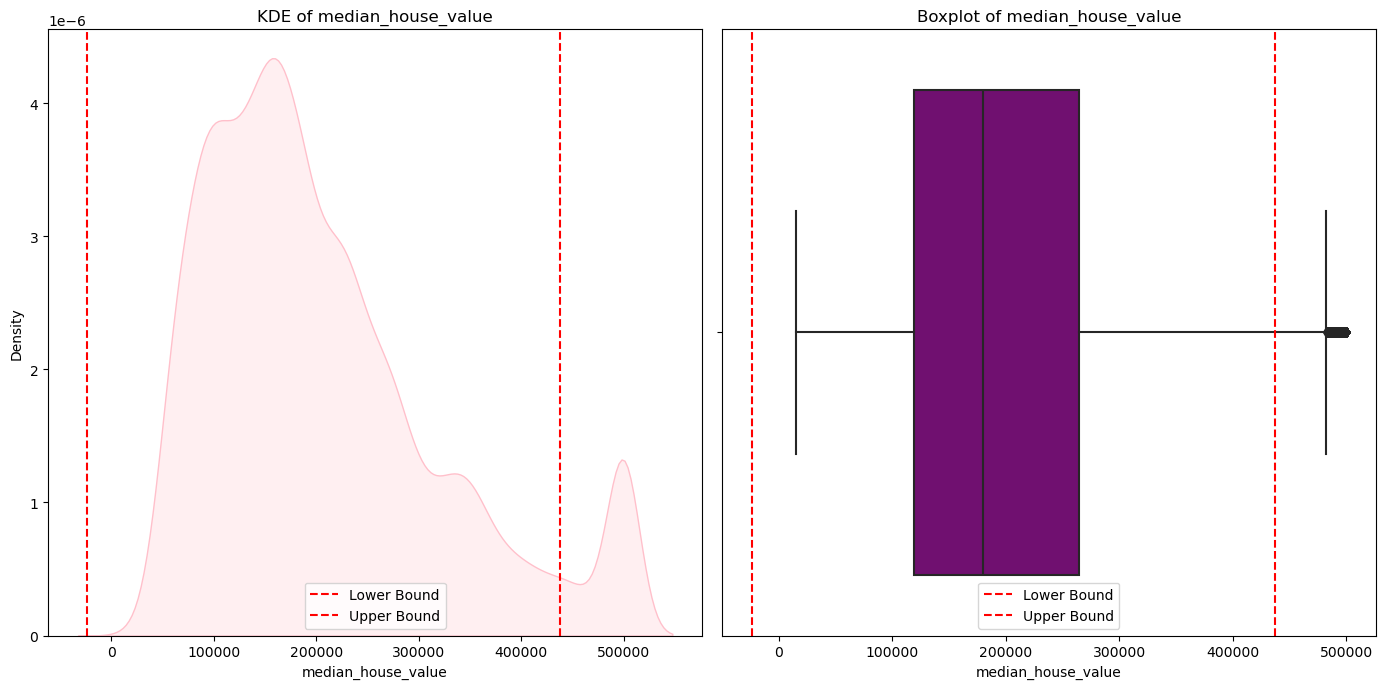

In [124]:
def identify_and_visualize_outliers(data, column_name):
    
    
    if column_name not in data.columns:
        print(f"Column '{column_name}' not found in the DataFrame.")
        return

    mean = data[column_name].mean()
    std_dev = data[column_name].std()
    
    lower_bound = mean - 2 * std_dev
    upper_bound = mean + 2 * std_dev
    
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    num_outliers = len(outliers)
    
    print(f"Number of outliers: {num_outliers}")

    plt.figure(figsize=(14, 7))
    
    plt.subplot(1, 2, 1)
    sns.kdeplot(data[column_name], fill=True, color='pink')
    plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
    plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
    plt.title(f'KDE of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Density')
    plt.legend()

    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column_name], color='purple')
    plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
    plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
    plt.title(f'Boxplot of {column_name}')
    plt.xlabel(column_name)
    plt.legend()

    plt.tight_layout()
    plt.show()

column_to_analyze = 'median_house_value'

# Call the function
identify_and_visualize_outliers(data, column_to_analyze)

In [127]:
X = data.drop(['median_house_value'], axis=1).select_dtypes(include=[float, int])
y = data['median_house_value']

mm_scaler = MinMaxScaler()
s_scaler = StandardScaler()
r_scaler = RobustScaler()
q_scaler = QuantileTransformer()
p_scaler = PowerTransformer()

X_mm = mm_scaler.fit_transform(X)
X_s = s_scaler.fit_transform(X)
X_r = r_scaler.fit_transform(X)
X_q = q_scaler.fit_transform(X)
X_p = p_scaler.fit_transform(X)


In [130]:
print("Min-Max Scaler:")
print("Min values:", np.min(X_mm, axis=0))
print("Max values:", np.max(X_mm, axis=0))

print("\nStandard Scaler:")
print("Mean values:", np.mean(X_s, axis=0))
print("Standard deviations:", np.std(X_s, axis=0))

print("\nRobust Scaler:")
print("Median values:", np.median(X_r, axis=0))
print("Interquartile range:", np.percentile(X_r, 25, axis=0) - np.percentile(X_r, 25, axis=0))

print("\nQuantile Transformer:")
print("Min values:", np.min(X_q, axis=0))
print("Max values:", np.max(X_q, axis=0))

print("\nPower Transformer:")
print("Mean values:", np.mean(X_p, axis=0))
print("Standard deviations:", np.std(X_p, axis=0))

Min-Max Scaler:
Min values: [0. 0. 0. 0. 0. 0. 0. 0.]
Max values: [1. 1. 1. 1. 1. 1. 1. 1.]

Standard Scaler:
Mean values: [-8.52651283e-15 -1.07958431e-15  5.50808322e-18  3.20157337e-17
  1.92782913e-16 -1.10161664e-17  6.88510403e-17  6.60969987e-17]
Standard deviations: [1. 1. 1. 1. 1. 1. 1. 1.]

Robust Scaler:
Median values: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.01860794e-16]
Interquartile range: [0. 0. 0. 0. 0. 0. 0. 0.]

Quantile Transformer:
Min values: [0. 0. 0. 0. 0. 0. 0. 0.]
Max values: [1. 1. 1. 1. 1. 1. 1. 1.]

Power Transformer:
Mean values: [ 3.66443525e-18 -8.57559974e-09 -1.21177831e-16 -7.02280611e-17
  9.41882231e-16  6.80248278e-16  7.02280611e-16  7.38083152e-16]
Standard deviations: [1.85554645e-15 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]


Min-Max Scaler: Best for neural networks and algorithms sensitive to the scale.
Standard Scaler: Preferred for algorithms assuming normality or sensitive to variance.
Robust Scaler: Ideal when dealing with outliers.
Quantile Transformer: Useful when you want to achieve normality or uniformity.
Power Transformer: Effective for normalizing skewed data.

Standard Scaler: Standardizes features by removing the mean and scaling to unit variance. Useful when features have different units or scales. Sensitive to outliers, which can affect the mean and standard deviation.
MinMax Scaler: Scales features to a fixed range, usually [0, 1]. Useful when you need features in a specific range. Sensitive to outliers, which can affect the minimum and maximum values.

Robust Scaler: Less sensitive to outliers, based on median and IQR.
Quantile Transformer: Fits into a uniform distribution at the same time, might skew data.
Power Transforer: Applies a power transformation, makes it more Gaussian. Data required to be non-negative.


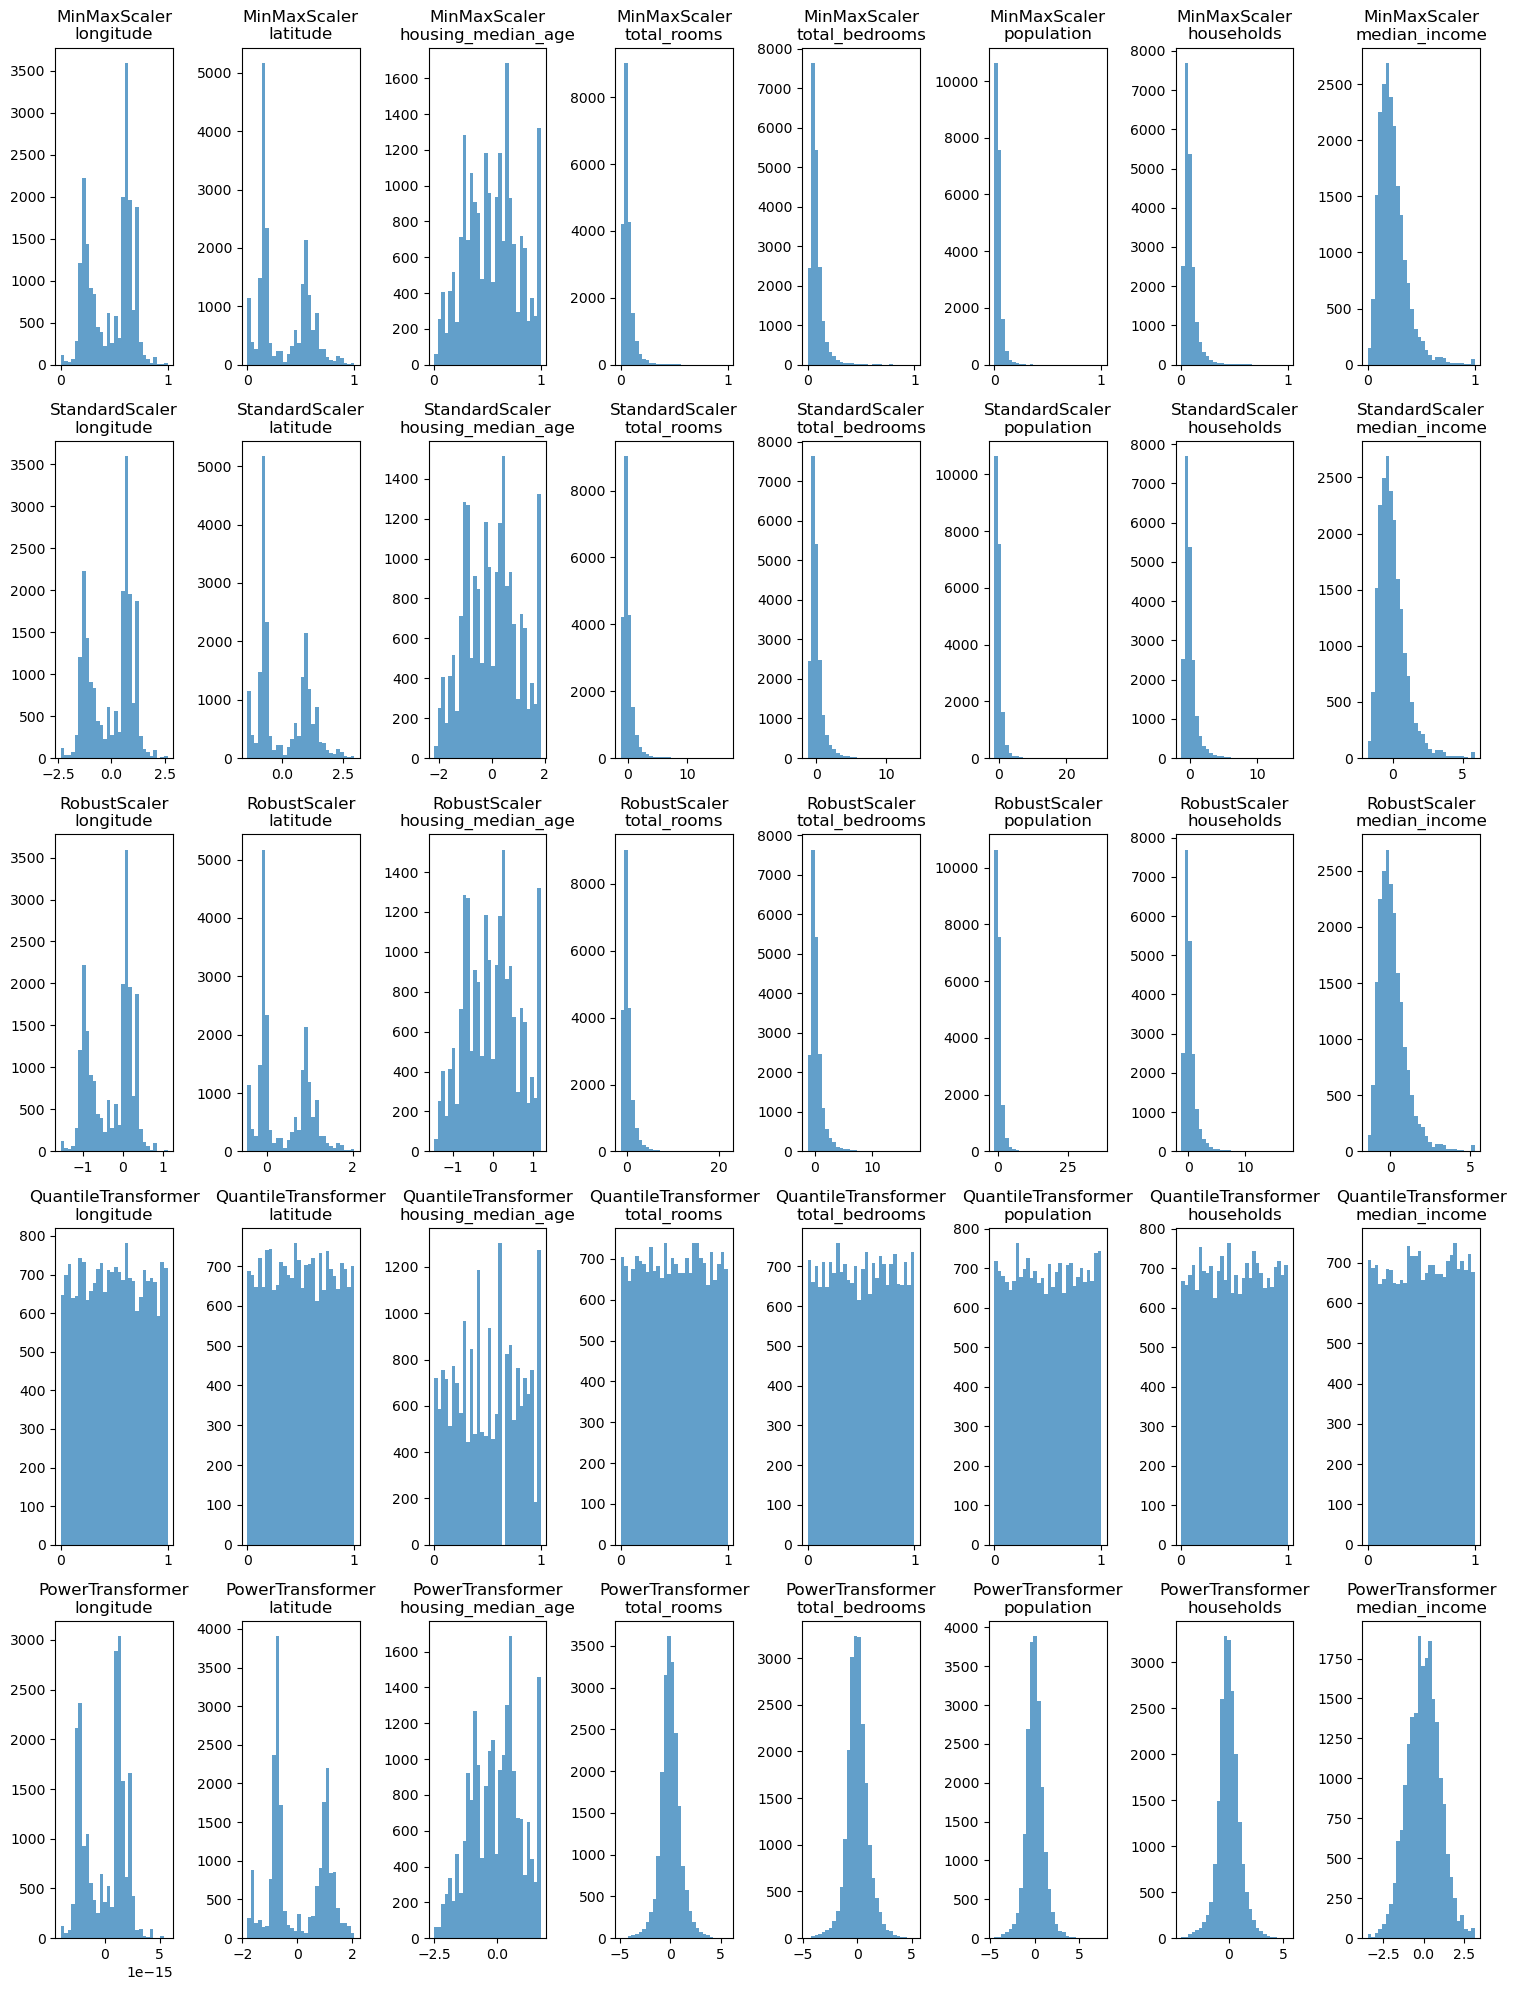

In [132]:
scalers = {
    'MinMaxScaler': X_mm,
    'StandardScaler': X_s,
    'RobustScaler': X_r,
    'QuantileTransformer': X_q,
    'PowerTransformer': X_p
}

fig, axes = plt.subplots(nrows=len(scalers), ncols=len(X.columns), figsize=(15, 20))

for i, (scaler_name, scaled_data) in enumerate(scalers.items()):
    for j, column in enumerate(X.columns):
        axes[i, j].hist(scaled_data[:, j], bins=30, alpha=0.7)
        axes[i, j].set_title(f'{scaler_name}\n{column}')

plt.tight_layout()
plt.show()